<a href="https://colab.research.google.com/github/Isra1997/EdgeDetection/blob/master/Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from PIL import  Image
import numpy as np
import matplotlib.pyplot as plt
import math

#function used to Calculate the LoG function
def LoG_Function(X,Y,Sigma):
    return (-1/(math.pi*Sigma**4))*(1-((X**2+Y**2)/(2*Sigma**2)))* math.exp(-1*((X**2+Y**2)/(2*Sigma**2)))

#function used to Calculate the LoG mask
def CalculateKernal(Sigma,size):
    Result_Matrix=np.zeros([size,size])
    for i in range(size):
        for j in range(size):
            Result_Matrix[i,j]=round(260*LoG_Function(i-(size-1)/2,j-(size-1)/2,Sigma))
    return Result_Matrix


def prewitt(image,Sigma,Threshold):
    
    width=image.shape[0]
    height=image.shape[1]
    
    sumOfVertical=0
    sumOfHorizontal=0
    
    #prewitt operators
    H1=[[1,1,1],
        [0,0,0],
        [-1,-1,-1]]
    
    H2=[[-1,0,1],
        [-1,0,1],
        [-1,0,1]]
    
    #Intializing empty numpy array
    Thresholding_array=np.zeros(image.shape)
    magnitude_array=np.zeros(image.shape)
    LoG_array=np.zeros(image.shape)
    
    #Getting the horizontal edges
    for i in range(width-2):
        for j in range(height-2):
            sumOfHorizontal=np.sum(np.multiply(H1,image[i:i+3,j:j+3]))
            sumOfVertical=np.sum(np.multiply(H2,image[i:i+3,j:j+3]))
            magnitude_array[i,j]=math.sqrt(sumOfHorizontal**2+sumOfVertical**2)
            
    #Calculating the size of kernal  
    size=(2*math.ceil(3*Sigma)+1)
    #Calculating the LoG  kernal
    LoG_kernal=CalculateKernal(Sigma,size)
    
    #Calculating the LoG image
    for i in range(width-size-1):
        for j in range(height-size-1):
            LoG_array[i,j]=np.sum(np.multiply(LoG_kernal,image[i:i+size,j:j+size]))
    
            
    #Thresholding the image
    for i in range(width):
        for j in range(height):
            if((magnitude_array[i,j]>Threshold*255 and LoG_array[i,j]<=0)):
                Thresholding_array[i,j]=1
            else:
                Thresholding_array[i,j]=0
                
    return Thresholding_array
             

# def main():
#     openImg=Image.open("/Users/israragheb/Desktop/Assignment2CV/Cameraman.tif").convert('L')  
#     testing0=prewitt(np.array(openImg),2,0.1)
#     testing1=prewitt(np.array(openImg),3,0.1)
#     testing2=prewitt(np.array(openImg),4,0.1)

#     plt.imshow(testing0,cmap='gray')
#     plt.imshow(testing1,cmap='gray')
#     plt.imshow(testing2,cmap='gray')

    
# if __name__=="__main__":
#     main()
    


In [0]:
openImg=Image.open("Cameraman.tif").convert('L')  

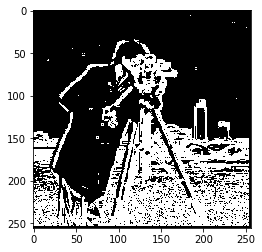

In [0]:
testing0=prewitt(np.array(openImg),2,0.1)
plt.imshow(testing0,cmap='gray')
plt.savefig("LoG_2.jpg")

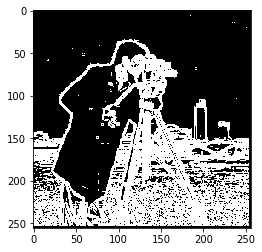

In [0]:
testing1=prewitt(np.array(openImg),3,0.1)
plt.imshow(testing1,cmap='gray')
plt.savefig("LoG_3.jpg")

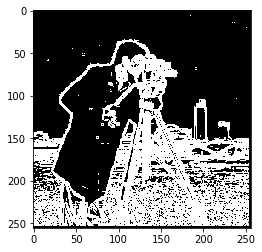

In [0]:
testing2=prewitt(np.array(openImg),4,0.1)
plt.imshow(testing2,cmap='gray')
plt.savefig("LoG_4.jpg")